In [63]:
%matplotlib notebook

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [65]:
# import csv
rough = "Resources/suicide_rates.csv"
rough_data_df = pd.read_csv(rough)

In [66]:
# drop unnecessary columns
rough_df = rough_data_df.drop(columns=["HDI for year", "country-year", "generation", "gdp_per_capita ($)", "suicides_no", "population"])

# drop rows with missing values
rough_df.dropna(how='any')

# clean up age range fill
rough_df['age'] = rough_df['age'].replace({'35-54 years': '35-54', '25-34 years': '25-34', '55-74 years': '55-74', '75+ years': '75+', '15-24 years': '15-24', '5-14 years': '05-14'})

# rename columns
renamed_df = rough_df.rename(columns={"country":"Country", "year":"Year", "sex":"Sex", "age":"Age Range", "suicides/100k pop":"Suicides/100k pop", " gdp_for_year ($) ":"GDP(Year)"})

# filter for years 2000-2016
after_start_date = renamed_df["Year"] >= 2000
before_end_date = renamed_df["Year"] <= 2016
between_two_dates = after_start_date & before_end_date
filtered_date = renamed_df.loc[between_two_dates]

filtered_date_df = pd.DataFrame(filtered_date)

# Convert data type for GDP calculations 
filtered_date_df["GDP(Year)"] = filtered_date_df["GDP(Year)"].str.replace(',','').astype(int)

# display sample
filtered_date_df.head()

,Country,Year,Sex,Age Range,Suicides/100k pop,GDP(Year)
132,Albania,2000,male,25-34,7.33,3632043908
133,Albania,2000,male,55-74,5.64,3632043908
134,Albania,2000,female,75+,5.29,3632043908
135,Albania,2000,male,75+,4.02,3632043908
136,Albania,2000,female,15-24,2.27,3632043908


In [85]:
# group by year and country / find averages

country_gdp = filtered_date_df.groupby(["Year", "Country"])["GDP(Year)"].mean()
country_suicide = filtered_date_df.groupby(["Year", "Country"])['Suicides/100k pop'].mean()

# create summary table
country_summary_df = pd.DataFrame({"GDP Mean": country_gdp, "Suicide Rate Mean": country_suicide})

# display table
country_summary_df


GDP Mean  Suicide Rate Mean
Year Country                                             
2000 Albania                3632043908           2.558333
     Antigua and Barbuda     830158778           3.330833
     Argentina            284203750000          10.949167
     Armenia                1911563665           2.858333
     Aruba                  1873452514          25.444167
...                                ...                ...
2016 Netherlands          777227541581          12.739000
     Qatar                152451923077           1.643000
     Romania              187805922349          11.633000
     Sweden               514459972806          13.884000
     Thailand             411755164833           7.732000

[1350 rows x 2 columns]

In [79]:
country_summary_df["Country"] = pd.Categorical(country_summary_df["Country"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = country_summary_df["Year"], 
    y = country_summary_df["GDP Mean"], 
    s = country_summary_df["Suicide Rate Mean"], 
    c = country_summary_df["Country"].cat.codes,
    cmap="tab20", 
    alpha=0.05, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Country")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

KeyError: 'Country'

In [69]:
# Group by Country, Year, Ages / find averages
age_gdp = filtered_date_df.groupby(["Year", "Country", "Age Range"])["GDP(Year)"].mean()
age_suicide = filtered_date_df.groupby(["Year", "Country", "Age Range"])['Suicides/100k pop'].mean()

# Creat summary table
age_summary_df = pd.DataFrame({"GDP Mean": age_gdp, "Suicide Rate Mean": age_suicide})

# Display table
age_summary_df


GDP Mean  Suicide Rate Mean
Year Country  Age Range                                 
2000 Albania  05-14        3632043908              0.135
              15-24        3632043908              2.175
              25-34        3632043908              4.275
              35-54        3632043908              1.290
              55-74        3632043908              2.820
...                               ...                ...
2016 Thailand 15-24      411755164833              4.065
              25-34      411755164833              7.970
              35-54      411755164833              8.810
              55-74      411755164833              8.885
              75+        411755164833              8.930

[8084 rows x 2 columns]

<IPython.core.display.Javascript object>


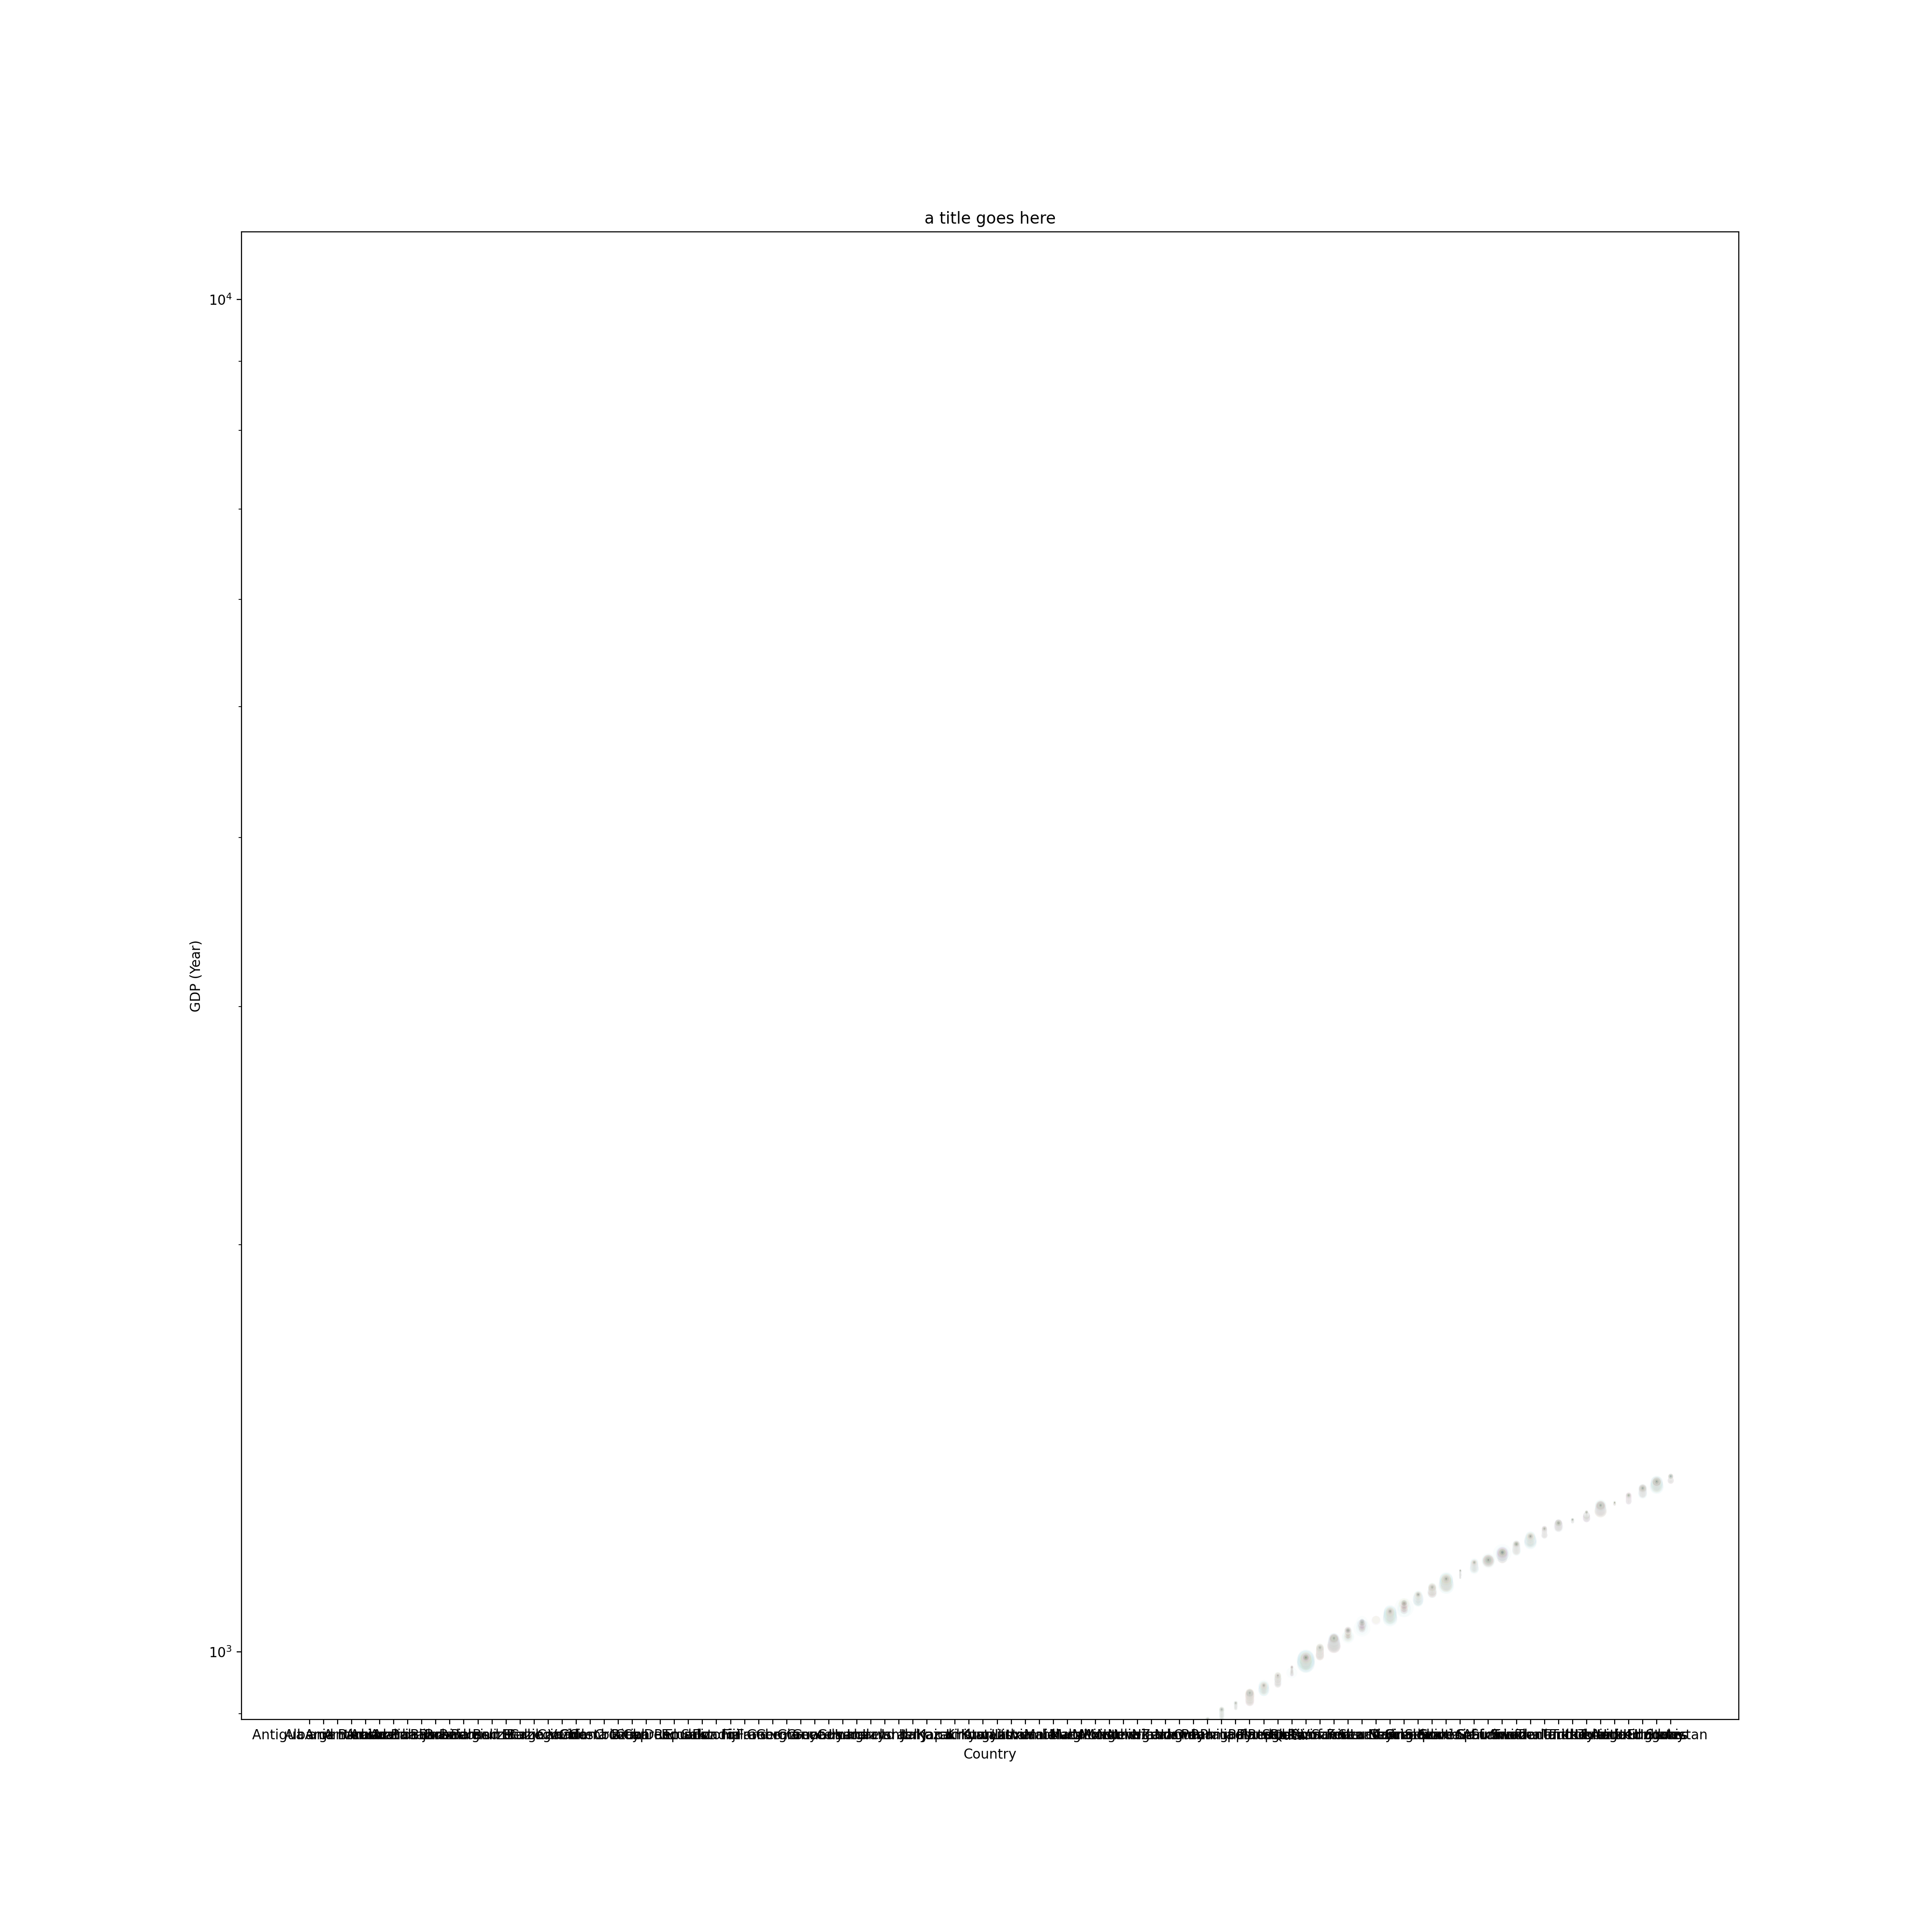

In [153]:
age_df["Age Range"] = pd.Categorical(age_df["Age Range"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = age_summary_df["Year"], 
    y = age_summary_df["GDP Mean"], 
    s= age_summary_df["Suicide Rate Mean"], 
    c= age_summary_df["Age Range"].cat.codes, 
    cmap="tab20", 
    alpha=0.05, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Year")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

In [87]:
# Group by Country, Year, Sex / find averages
sex_gdp = filtered_date_df.groupby(["Year", "Country", "Sex"])["GDP(Year)"].mean()
sex_suicide = filtered_date_df.groupby(["Year", "Country", "Sex"])['Suicides/100k pop'].mean()

# Creat summary table
sex_summary_df = pd.DataFrame({"GDP Mean": sex_gdp, "Suicide Rate Mean": sex_suicide})

# Display table
sex_summary_df

GDP Mean  Suicide Rate Mean
Year Country             Sex                                    
2000 Albania             female    3632043908           1.715000
                         male      3632043908           3.401667
     Antigua and Barbuda female     830158778           0.000000
                         male       830158778           6.661667
     Argentina           female  284203750000           3.345000
...                                       ...                ...
2016 Romania             male    187805922349          19.760000
     Sweden              female  514459972806           8.204000
                         male    514459972806          19.564000
     Thailand            female  411755164833           3.068000
                         male    411755164833          12.396000

[2700 rows x 2 columns]

In [71]:
sex_summary_df["Sex"] = pd.Categorical(sex_summary_df["Sex"])

# Set the figure size
plt.figure(figsize=(10, 10))

# Scatterplot
plt.scatter(
    x = sex_summary_df["Year"], 
    y = sex_summary_df["GDP Mean"], 
    s = sex_summary_df["Suicide Rate Mean"], 
    c = sex_summary_df["Sex"].cat.codes, 
    cmap="tab20", 
    alpha=0.05, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Year")
plt.ylabel("GDP Mean")
plt.title("a title goes here")
#plt.ylim(?,?)
#plt.xlim(?, ?);

# Display plot
plt.show()

NameError: name 'gender_df' is not defined

In [38]:
#Are suicide rates higher in developing countries or developed countries?

#heatmap of suicide rates globally 


In [98]:
#Country v.  Overall suicide rate
#mean_sui = filtered_date_df['Suicides/100k pop'].mean()
#filtered_date_df['Above Average?'] = (filtered_date_df['Suicides/100k pop'] >= mean_sui)

df_Country_Overall_suicide_rate = filtered_date_df.groupby('Country')['Suicides/100k pop'].mean()
#filtered_date_df.head()

#define 'Overall suicide rate'
#mean_sui1 = filtered_date_df['Suicides/100k pop'].mean()
mean_sui2 = df_Country_Overall_suicide_rate.mean()
#print(mean_sui1)raw average
#print(mean_sui2)average of averages
#df_Country_Overall_suicide_rate['Suicides/100k pop'] 
#df_df_Country_Overall_suicide_rate() 
Deviation = df_Country_Overall_suicide_rate - mean_sui2
country_mean_df = pd.DataFrame({"Country Mean":df_Country_Overall_suicide_rate, "Global Mean":mean_sui2, "Deviation":Deviation})
country_mean_df

,Country Mean,Global Mean,Deviation
Country,,,
Albania,3.381667,11.481212,-8.099545
Antigua and Barbuda,0.874405,11.481212,-10.606807
Argentina,10.186094,11.481212,-1.295118
Armenia,3.131517,11.481212,-8.349695
Aruba,8.142639,11.481212,-3.338573
...,...,...,...
United Arab Emirates,1.317917,11.481212,-10.163295
United Kingdom,6.769635,11.481212,-4.711577
United States,12.945417,11.481212,1.464205


In [72]:
#Gender v. Country & Suicide rate
Gender_tmp_df = filtered_date_df.groupby(['Country','Sex'])['Suicides/100k pop'].mean()


Gender_tmp_df.head()

Country              Sex   
Albania              female    2.475909
                     male      4.287424
Antigua and Barbuda  female    0.185952
                     male      1.562857
Argentina            female    3.373229
Name: Suicides/100k pop, dtype: float64

In [73]:
#Age Range v. Country & Suicide rate
Age_tmp_df = filtered_date_df.groupby(['Country','Age Range'])['Suicides/100k pop'].mean()

Age_tmp_df




Country     Age Range
Albania     05-14        0.524091
            15-24        3.287273
            25-34        4.156364
            35-54        3.963182
            55-74        3.438182
                           ...   
Uzbekistan  15-24        8.576250
            25-34        9.044583
            35-54        9.106667
            55-74        7.130000
            75+          5.862500
Name: Suicides/100k pop, Length: 587, dtype: float64

In [42]:
#suicide rates in the United States for 2017-2019?

In [43]:
#Aggrate data by gender/gdp & suicide rate for 2017-2019

In [44]:
#Aggrate Data by gender/gdp & suicide rate for 2017-2019